## Praproses Data Penelitian

### 1. Deklarasi Pustaka

In [1]:
# pustaka manipulasi data array
import numpy as np
from numpy import concatenate

# pustaka manipulasi data frame
import pandas as pd
from pandas import concat
from pandas import DataFrame

# pustaka tanggal
from datetime import datetime
from matplotlib import pyplot as plt

# pustaka normalisasi data
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

# pustaka data latih dan data uji
from sklearn.model_selection import train_test_split

### 2. Deklarasi Function

In [2]:
# define function
def plot_time_series(x, y, label, title):
    
    # membuat frame
    fig, ax = plt.subplots(figsize = (10,5))
    
    # membuat time series plot
    ax.plot(x, y, color="tab:blue", label=label, linewidth=2.5)
    
    # membuat label-label
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.legend(loc="best")
    ax.grid(True)
    
    # menampilkan plot
    plt.show()

### 3. Hotspot Sumatera Selatan

- Loada dataset

In [3]:
# load dataset
df_hotspot_1 = pd.read_csv("dataset/hotspot_sumsel_harian_2001_2022.csv", parse_dates=["acq_date"])

In [4]:
df_hotspot_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157946 entries, 0 to 157945
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   latitude    157946 non-null  float64       
 1   longitude   157946 non-null  float64       
 2   brightness  157946 non-null  float64       
 3   scan        157946 non-null  float64       
 4   track       157946 non-null  float64       
 5   acq_date    157946 non-null  datetime64[ns]
 6   acq_time    157946 non-null  int64         
 7   satellite   157946 non-null  object        
 8   instrument  157946 non-null  object        
 9   confidence  157946 non-null  int64         
 10  version     157946 non-null  float64       
 11  bright_t31  157946 non-null  float64       
 12  frp         157946 non-null  float64       
 13  daynight    157946 non-null  object        
 14  type        157946 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(3), object(

In [5]:
# load dataset
df_hotspot_2 = pd.read_csv("dataset/hotspot_sumsel_harian_2023.csv", parse_dates=["acq_date"])

In [6]:
df_hotspot_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    6280 non-null   float64       
 1   longitude   6280 non-null   float64       
 2   brightness  6280 non-null   float64       
 3   scan        6280 non-null   float64       
 4   track       6280 non-null   float64       
 5   acq_date    6280 non-null   datetime64[ns]
 6   acq_time    6280 non-null   int64         
 7   satellite   6280 non-null   object        
 8   instrument  6280 non-null   object        
 9   confidence  6280 non-null   int64         
 10  version     6280 non-null   object        
 11  bright_t31  6280 non-null   float64       
 12  frp         6280 non-null   float64       
 13  daynight    6280 non-null   object        
 14  field_15    3 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(4)
memory usage: 736.

In [7]:
df_hotspot = pd.concat([df_hotspot_1, df_hotspot_2])

In [8]:
df_hotspot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164226 entries, 0 to 6279
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   latitude    164226 non-null  float64       
 1   longitude   164226 non-null  float64       
 2   brightness  164226 non-null  float64       
 3   scan        164226 non-null  float64       
 4   track       164226 non-null  float64       
 5   acq_date    164226 non-null  datetime64[ns]
 6   acq_time    164226 non-null  int64         
 7   satellite   164226 non-null  object        
 8   instrument  164226 non-null  object        
 9   confidence  164226 non-null  int64         
 10  version     164226 non-null  object        
 11  bright_t31  164226 non-null  float64       
 12  frp         164226 non-null  float64       
 13  daynight    164226 non-null  object        
 14  type        157946 non-null  float64       
 15  field_15    3 non-null       float64       
dtypes: dateti

In [9]:
df_hotspot

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,field_15
0,-2.82010,104.07160,307.40,1.90,1.30,2001-01-14,405,Terra,MODIS,41,6.03,288.70,7.60,D,2.0,NaN
1,-2.82250,104.08820,313.20,1.90,1.30,2001-01-14,405,Terra,MODIS,68,6.03,290.70,17.70,D,2.0,NaN
2,-2.82770,104.08090,313.90,1.90,1.30,2001-01-14,405,Terra,MODIS,68,6.03,290.80,19.40,D,2.0,NaN
3,-2.82460,104.07820,302.30,1.80,1.30,2001-02-10,1607,Terra,MODIS,48,6.03,279.10,11.80,N,2.0,NaN
4,-2.82160,104.08290,306.10,1.20,1.10,2001-02-23,1536,Terra,MODIS,67,6.03,290.80,7.30,N,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,-4.46693,104.21229,317.57,1.06,1.03,2023-11-06,707,Aqua,MODIS,40,6.1NRT,297.65,7.32,D,NaN,NaN
6276,-4.70200,104.09773,353.79,1.18,1.08,2023-11-08,652,Aqua,MODIS,96,6.1NRT,301.75,80.91,D,NaN,NaN
6277,-4.70346,104.08731,351.47,1.18,1.08,2023-11-08,652,Aqua,MODIS,95,6.1NRT,301.78,74.63,D,NaN,NaN
6278,-4.61046,104.29850,319.77,1.15,1.07,2023-11-08,652,Aqua,MODIS,54,6.1NRT,300.49,10.87,D,NaN,NaN


In [10]:
# # set index 
# df_hotspot = df_hotspot.set_index("acq_date")

- Aggregasi dataset

In [11]:
# Agregasi data harian menjadi bulanan dengan menghitung jumlah hotspot per bulan
df_hotspot_bulanan = df_hotspot.resample('M', on='acq_date').size().reset_index(name='hotspot')

In [12]:
df_hotspot_bulanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [13]:
# df_hotspot_bulanan.to_csv("dataset/hotspot_sumsel_bulanan_2001_2022.csv", index=False)

- Visualisasi dataset

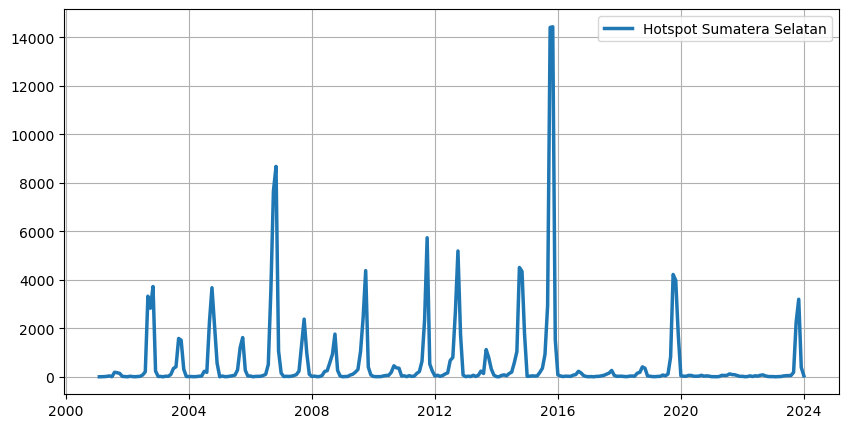

In [14]:
plot_time_series(df_hotspot_bulanan["acq_date"], df_hotspot_bulanan["hotspot"], "Hotspot Sumatera Selatan", "")

### 4. Index SOI

In [15]:
soi = pd.read_excel("dataset/dataset_enso.xlsx", sheet_name="SOI Results")

In [16]:
soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      264 non-null    datetime64[ns]
 1   anomali   264 non-null    float64       
 2   standard  264 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.3 KB


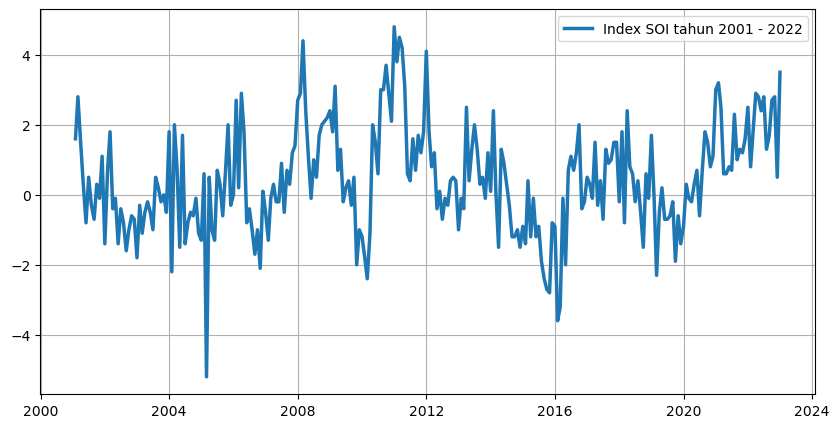

In [17]:
plot_time_series(soi["date"], soi["anomali"], "Index SOI tahun 2001 - 2022", "")

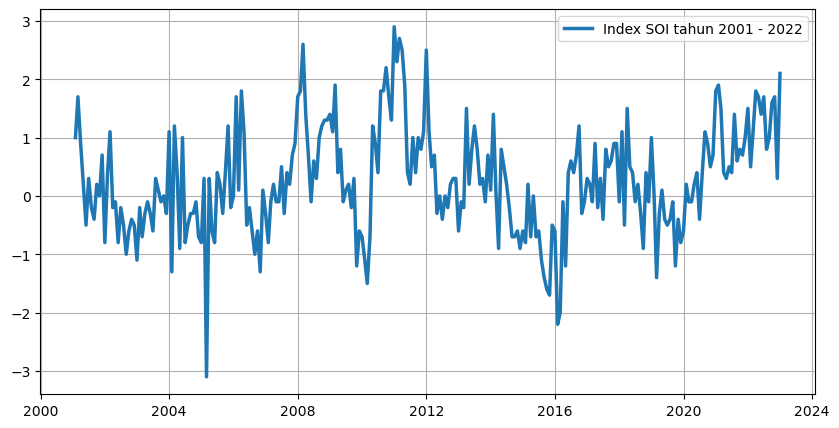

In [18]:
plot_time_series(soi["date"], soi["standard"], "Index SOI tahun 2001 - 2022", "")

### 5. SST Nina 3.4

In [19]:
sst = pd.read_excel("dataset/dataset_enso.xlsx", sheet_name="SST Results")

In [20]:
sst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      264 non-null    datetime64[ns]
 1   anomali   264 non-null    float64       
 2   standard  264 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.3 KB


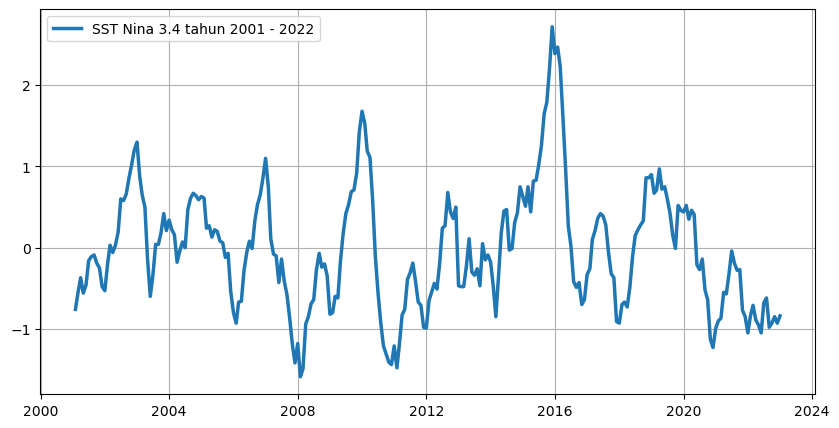

In [21]:
plot_time_series(sst["date"], sst["anomali"], "SST Nina 3.4 tahun 2001 - 2022", "")

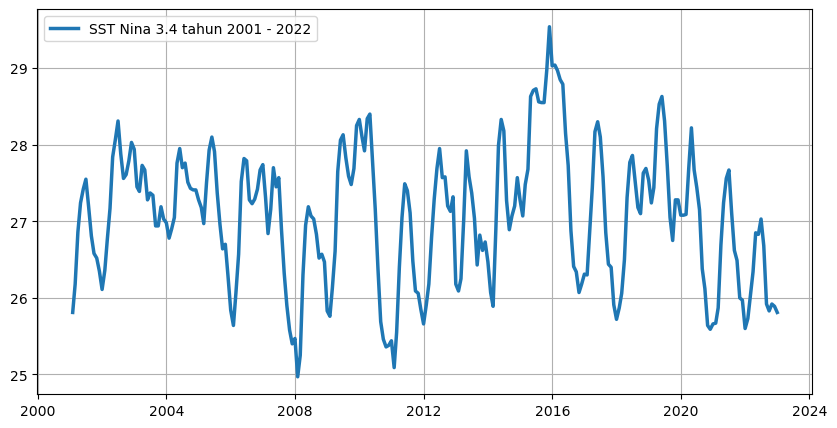

In [22]:
plot_time_series(sst["date"], sst["standard"], "SST Nina 3.4 tahun 2001 - 2022", "")